# **CASE: LIMITE DE CARTÃO DE CRÉDITO**

---

### Carregamento de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import sys
import os
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from feature_engine import encoding

# Adiciona o caminho da pasta 'py_functions' ao sys.path
sys.path.append(os.path.abspath('../../py_functions'))
from functions import iv_woe

### Leitura da base de dados

In [28]:
dados_limite = pd.read_csv("../Dados/Limite_Cartao.txt",sep = "\t",decimal=',')

### Visualização da base de dados

In [29]:
dados_limite

,ID_CLIENTE,SCORE_CREDITO,VALOR_TOTAL_ATRASOS_12M,QTD_CONSULTAS_CREDITO_12M,RENDIMENTO_MEDIO_12M,TEMPO_TRABALHO,IDADE,QTD_DEPENDENTES,LIMITE_INICIAL_CARTAO
0,1,79,0.00,2,9350,15,37,0,9700
1,2,73,3195.52,1,2010,17,22,0,1400
2,3,80,0.00,3,15660,16,57,2,9800
3,4,77,0.00,1,18640,11,33,0,8300
4,5,89,0.00,1,7550,15,21,1,11700
...,...,...,...,...,...,...,...,...,...
2495,2496,79,1881.95,4,0,13,40,1,2700
2496,2497,76,269.58,1,13050,23,62,0,8100
2497,2498,82,0.00,2,9070,14,50,1,8600
2498,2499,89,323.40,3,6680,14,29,1,9800


### Análise exploratória breve

In [30]:
# Medidas resumo
dados_limite.describe()

,ID_CLIENTE,SCORE_CREDITO,VALOR_TOTAL_ATRASOS_12M,QTD_CONSULTAS_CREDITO_12M,RENDIMENTO_MEDIO_12M,TEMPO_TRABALHO,IDADE,QTD_DEPENDENTES,LIMITE_INICIAL_CARTAO
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1250.50000,79.571200,823.859516,2.068400,10701.00800,14.952400,34.738000,1.107200,8039.760000
std,721.83216,7.549022,1412.393958,0.785346,5425.75907,4.990721,11.185786,0.848526,3862.213073
min,1.00000,44.000000,0.000000,1.000000,0.00000,1.000000,18.000000,0.000000,1000.000000
25%,625.75000,75.000000,0.000000,2.000000,6800.00000,12.000000,27.000000,1.000000,5200.000000
50%,1250.50000,80.000000,0.000000,2.000000,9920.00000,15.000000,33.000000,1.000000,8000.000000
75%,1875.25000,85.000000,1215.477500,2.000000,14062.50000,18.000000,41.000000,2.000000,10600.000000
max,2500.00000,100.000000,16109.310000,6.000000,38580.00000,33.000000,66.000000,5.000000,24200.000000


### Análise bivariada: variável resposta vs. variáveis explicativas

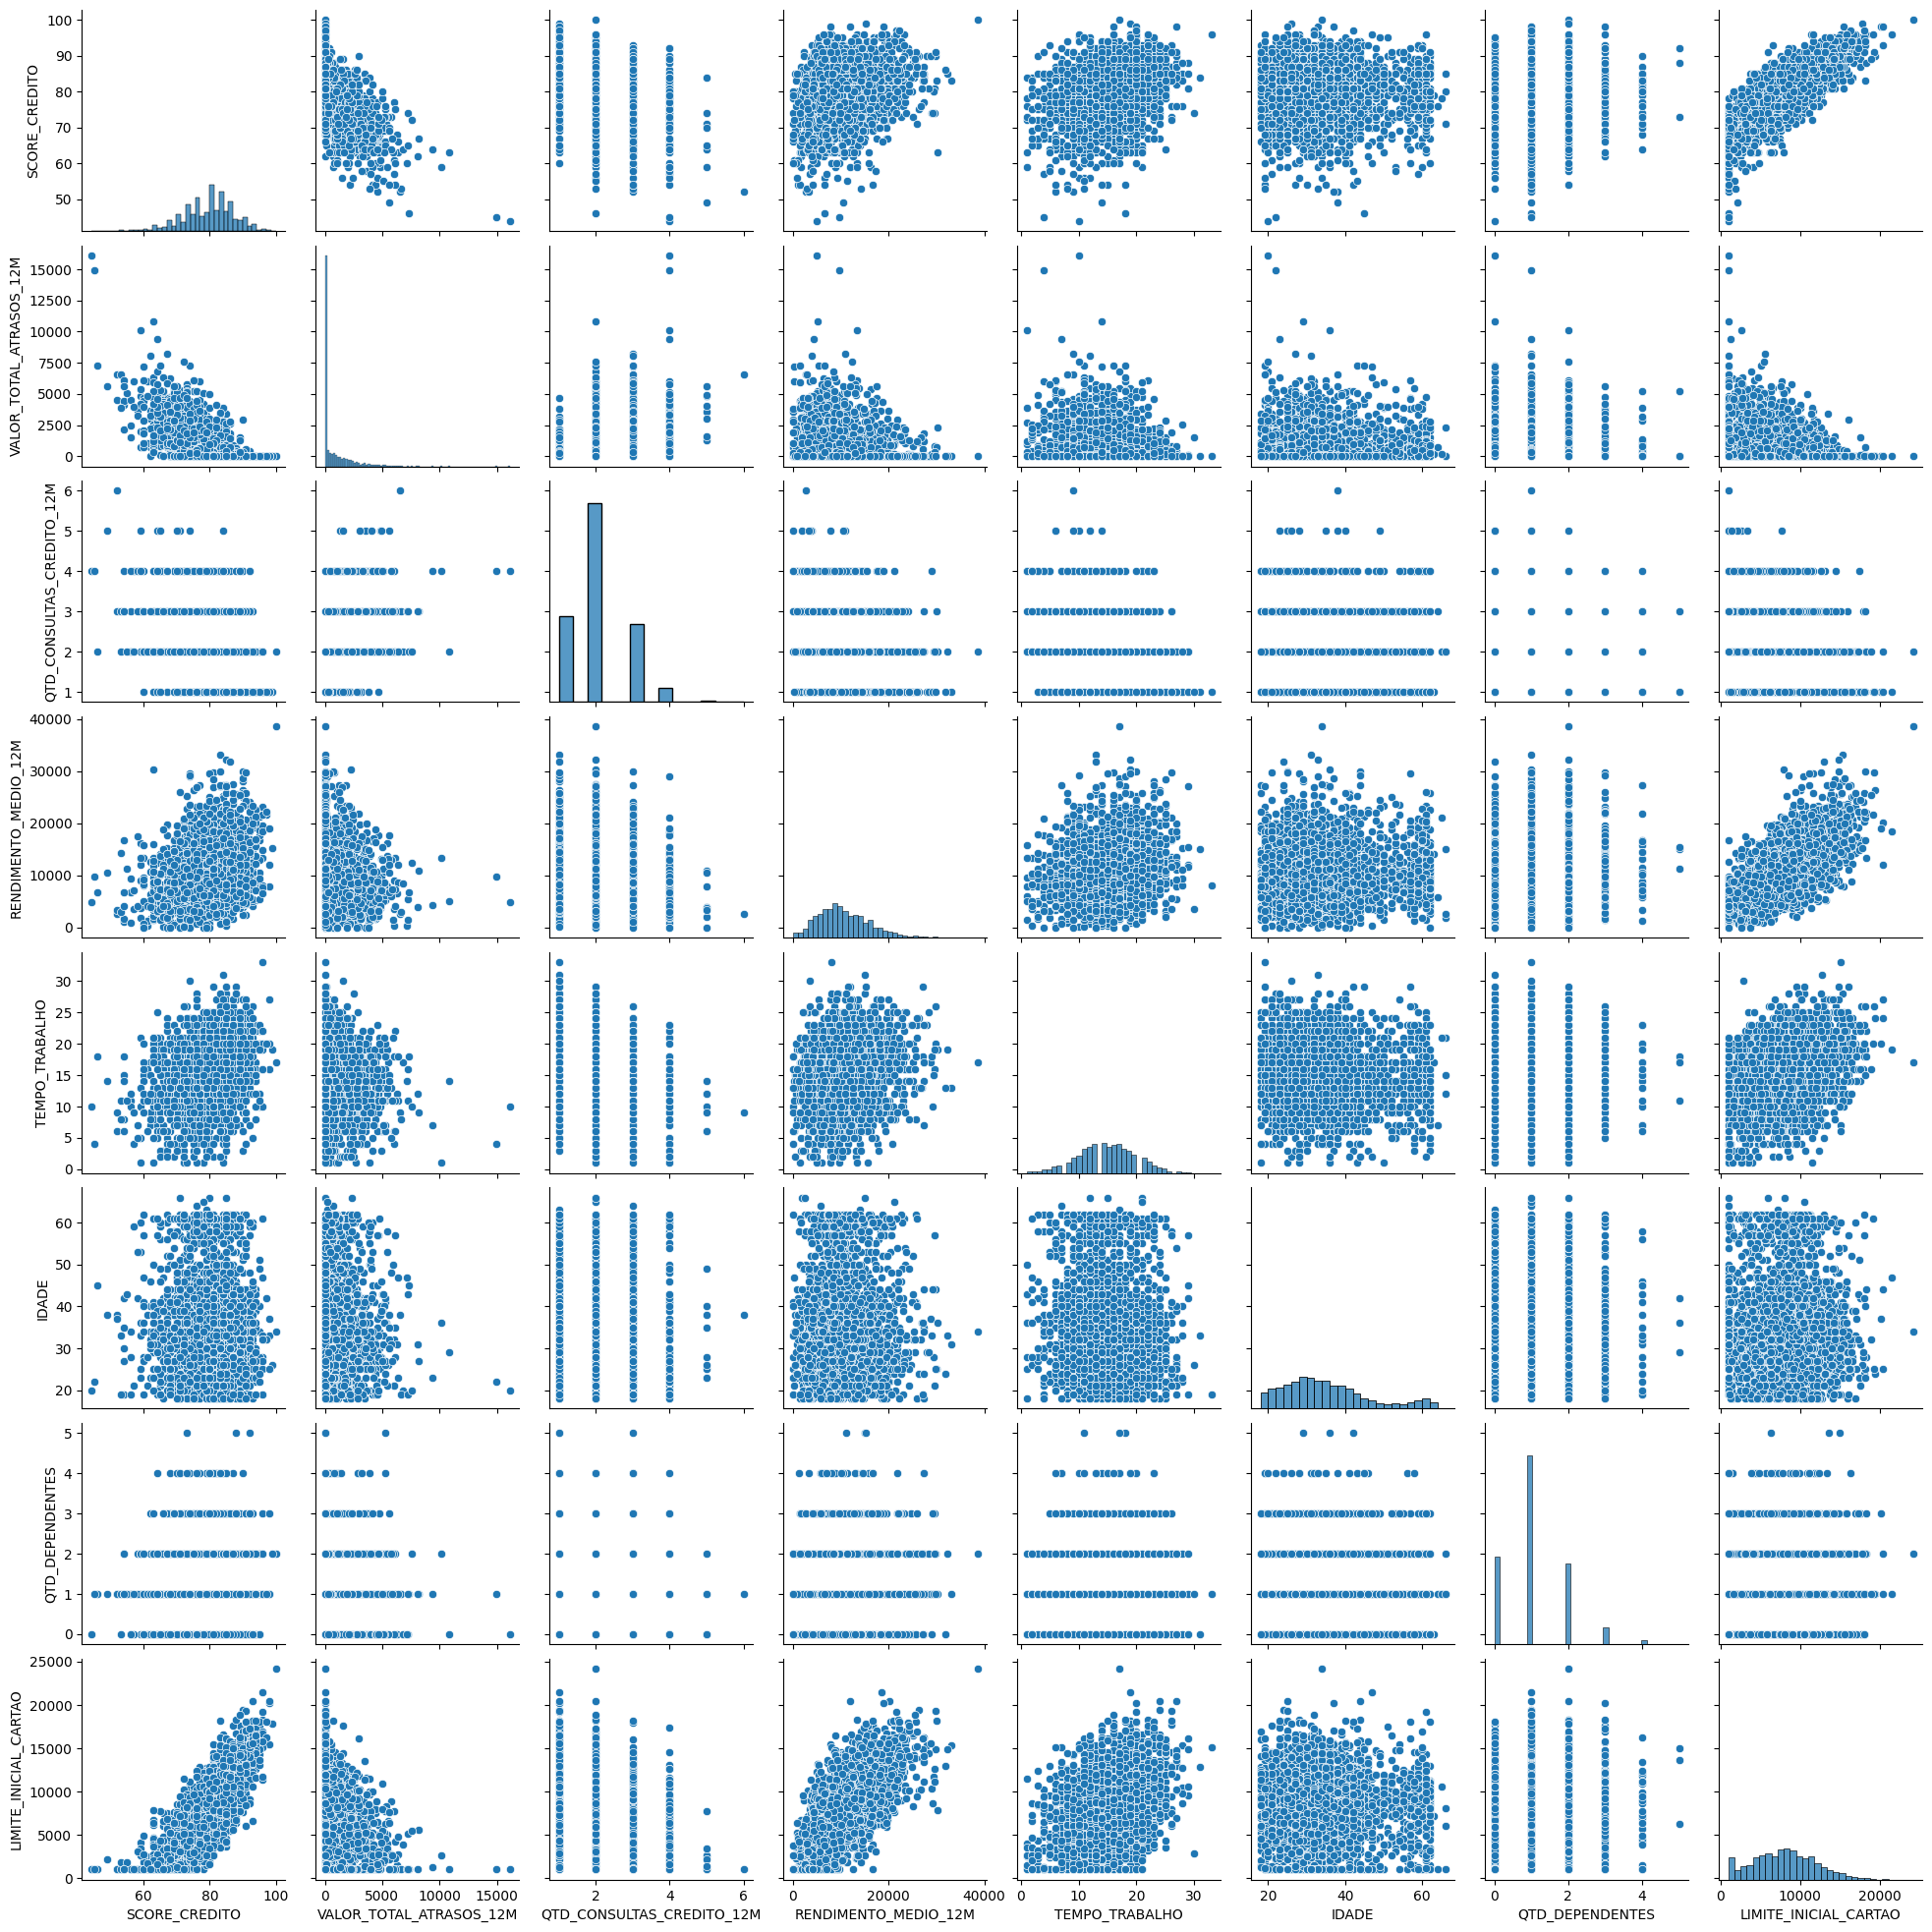

In [32]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Basic correlogram
sns.pairplot(dados_limite[vars])
plt.show()


In [31]:
vars = dados_limite.columns.tolist()
vars.remove('ID_CLIENTE')
corr = dados_limite[vars].corr()

corr.style.background_gradient(cmap='coolwarm') # This line plots nicely visualized matrix of correlation


,SCORE_CREDITO,VALOR_TOTAL_ATRASOS_12M,QTD_CONSULTAS_CREDITO_12M,RENDIMENTO_MEDIO_12M,TEMPO_TRABALHO,IDADE,QTD_DEPENDENTES,LIMITE_INICIAL_CARTAO
SCORE_CREDITO,1.000000,-0.615433,-0.380997,0.273630,0.276569,0.006161,-0.008689,0.789610
VALOR_TOTAL_ATRASOS_12M,-0.615433,1.000000,0.382832,-0.173270,-0.178298,-0.025478,0.006863,-0.424734
QTD_CONSULTAS_CREDITO_12M,-0.380997,0.382832,1.000000,-0.165356,-0.279015,0.006550,-0.017613,-0.379754
RENDIMENTO_MEDIO_12M,0.273630,-0.173270,-0.165356,1.000000,0.194835,0.012075,0.042943,0.667861
TEMPO_TRABALHO,0.276569,-0.178298,-0.279015,0.194835,1.000000,-0.020875,-0.003047,0.386847
IDADE,0.006161,-0.025478,0.006550,0.012075,-0.020875,1.000000,0.013416,-0.003957
QTD_DEPENDENTES,-0.008689,0.006863,-0.017613,0.042943,-0.003047,0.013416,1.000000,0.018736
LIMITE_INICIAL_CARTAO,0.789610,-0.424734,-0.379754,0.667861,0.386847,-0.003957,0.018736,1.000000


In [ ]:
# Comando auxiliar para aumentar resolução do gráfico (recomendado apenas no Colab)
reset_options <- options()
options(repr.plot.width = 15, repr.plot.height = 15)

In [ ]:
# Correlograma
ggpairs(dados_limite[, !names(dados_limite) %in% "ID_CLIENTE"],
        title = "Correlograma",
        upper = list(continuous = wrap("cor", size = 5)))

In [ ]:
# Resetando parâmetros gráficos (recomendado apenas no Colab)
options(reset_options)

### Modelo de regressão linear múltipla

In [ ]:
# Comando auxiliar para para omitir notação científica nos p-valores e controlar largura dos outputs na tela do Colab
options(scipen = 999, width = 200)

In [ ]:
# Ajuste do modelo 1: inicial
regressao_1 <- lm(LIMITE_INICIAL_CARTAO ~
                  SCORE_CREDITO +
                  VALOR_TOTAL_ATRASOS_12M +
                  QTD_CONSULTAS_CREDITO_12M +
                  RENDIMENTO_MEDIO_12M +
                  TEMPO_TRABALHO +
                  IDADE +
                  QTD_DEPENDENTES,
                data = dados_limite)

summary(regressao_1)

In [ ]:
# Ajuste do modelo 2: retirando QTD_DEPENDENTES
regressao_2 <- lm(LIMITE_INICIAL_CARTAO ~
                  SCORE_CREDITO +
                  VALOR_TOTAL_ATRASOS_12M +
                  QTD_CONSULTAS_CREDITO_12M +
                  RENDIMENTO_MEDIO_12M +
                  TEMPO_TRABALHO +
                  IDADE,
                data = dados_limite)

summary(regressao_2)

In [ ]:
# Ajuste do modelo 3: retirando IDADE
regressao_3 <- lm(LIMITE_INICIAL_CARTAO ~
                  SCORE_CREDITO +
                  VALOR_TOTAL_ATRASOS_12M +
                  QTD_CONSULTAS_CREDITO_12M +
                  RENDIMENTO_MEDIO_12M +
                  TEMPO_TRABALHO,
                data = dados_limite)

summary(regressao_3)

In [ ]:
# Avaliação de colinearidade no modelo 3
data.frame(VIF = vif(regressao_3))

In [ ]:
# Ajuste do modelo 4: retirando VALOR_TOTAL_ATRASOS_12M (colinearidade)
regressao_4 <- lm(LIMITE_INICIAL_CARTAO ~
                  SCORE_CREDITO +
                  QTD_CONSULTAS_CREDITO_12M +
                  RENDIMENTO_MEDIO_12M +
                  TEMPO_TRABALHO,
                data = dados_limite)

summary(regressao_4)

In [ ]:
# Avaliação de colinearidade no modelo 4
data.frame(VIF = vif(regressao_4))

### Intervalos de confiança

In [ ]:
# Escolha do beta (0 para intercepto, ou 1, 2, ... para os ângulos referentes a cada variável explicativa)
beta = 0

In [ ]:
# Cálculo do intervalo
print("Limite inferior")
as.numeric(regressao_4$coefficients[beta + 1] - 1.96 * coef(summary(regressao_4))[beta + 1, "Std. Error"])
print("Limite superior")
as.numeric(regressao_4$coefficients[beta + 1] + 1.96 * coef(summary(regressao_4))[beta + 1, "Std. Error"])

### Qualidade de ajuste

In [ ]:
# Coeficiente de determinação ajustado (R² ajustado)
summary(regressao_4)$adj.r.squared

In [ ]:
# MAE
sum(abs(regressao_4$residuals))/nrow(dados_limite)

In [ ]:
# MAPE
sum(abs(regressao_4$residuals/dados_limite$LIMITE_INICIAL_CARTAO))/nrow(dados_limite)

### Análise de resíduos

In [ ]:
# Histograma dos resíduos
hist(x      = regressao_4$residuals,
     main   = "Histograma dos resíduos",
     col    = "darkturquoise",
     border = "white")

In [ ]:
# QQ plot dos resíduos
qqnorm(y    = regressao_4$residuals,
       main = "QQ-plot dos resíduos",
       col  = "darkturquoise",
       pch  = 19)
qqline(y    = regressao_4$residuals,
       col  = "red")

In [ ]:
# Resíduos vs. valores preditos
plot(x    = regressao_4$fitted.values,
     y    = regressao_4$residuals,
     pch  = 19,
     col  = "darkturquoise",
     xlab = "Valores ajustados",
     ylab = "Resíduos",
     main = "Resíduos vs. valores ajustados")

### Exemplo de uso (aplicação) do modelo

In [ ]:
# Criação de base de dados com um novo cliente, com 80 pontos de score de crédito, 1 consulta de crédito nos últimos 12m, rendimento médio de 5.000 reais e 5 anos de tempo de trabalho
# Obs.: os nomes das colunas devem ser idênticos aos da base utilizada para construção do modelo
novos_dados <- data.frame(SCORE_CREDITO             = c(80),
                          QTD_CONSULTAS_CREDITO_12M = c(1),
                          RENDIMENTO_MEDIO_12M      = c(5000),
                          TEMPO_TRABALHO            = c(5))

In [ ]:
# Aplicação do modelo
novos_dados$LIMITE_INICIAL_CARTAO_PREDITO <- predict(regressao_4, novos_dados)
View(novos_dados)